In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
import numpy as np
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
#Binary classificator
y_train_6 = (y_train ==6)
y_test_6 = (y_test ==6)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.9829 , 0.98025, 0.9804 ])

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)
confusion_matrix(y_train_6, y_train_pred)

array([[53562,   520],
       [  609,  5309]])

In [13]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_6, y_train_pred))
print(recall_score(y_train_6, y_train_pred))

0.9107908732201063
0.8970936127069956


In [14]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.9038903549842513

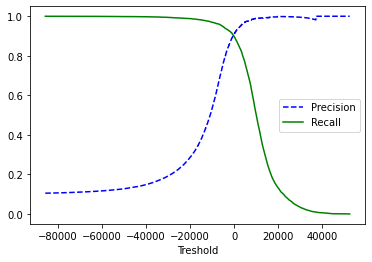

In [15]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3, method="decision_function")
precision, recall, tresholds = precision_recall_curve(y_train_6, y_scores)
plt.plot(tresholds, precision[:-1], "b--", label="Precision")
plt.plot(tresholds, recall[:-1], "g-", label="Recall")
plt.legend()
plt.xlabel("Treshold")
plt.show()

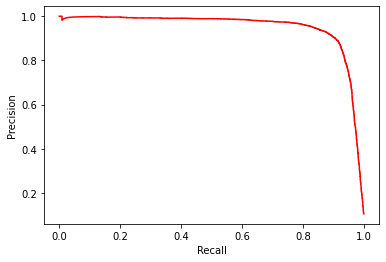

In [16]:
plt.plot(recall[:-1], precision[:-1], 'r')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

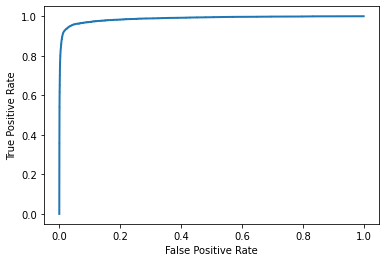

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_6, y_scores)
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_6, y_scores)

0.9878749264865954

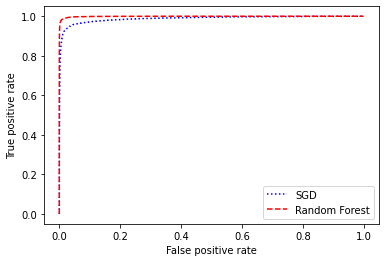

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, tresholds_forest = roc_curve(y_train_6, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "r--", label="Random Forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [20]:
roc_auc_score(y_train_6, y_scores_forest)

0.9991551090374211

In [21]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=3)
print(recall_score(y_train_6, y_pred_forest))
print(precision_score(y_train_6, y_pred_forest))

0.9393376140588037
0.9898504273504274


In [22]:
from sklearn.preprocessing import StandardScaler

sgd_clf = SGDClassifier(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

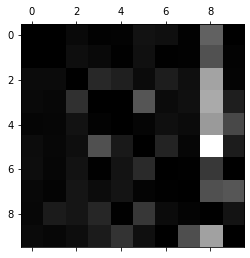

In [36]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {'n_neighbors':[2,3,5,8], 'weights':['uniform', 'distance']}
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring="f1")

grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

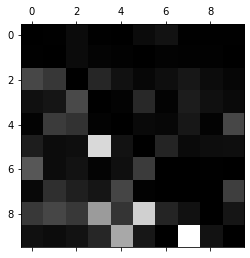

In [35]:
knn_clf = KNeighborsClassifier(n_neighbors=2, weights='uniform')
y_train_pred = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()